In [90]:
import cv2
import matplotlib.pyplot as plt

building = cv2.imread("../images/building.tif",cv2.IMREAD_UNCHANGED)
mandril = cv2.imread("../images/mandril.tiff",cv2.IMREAD_UNCHANGED)
messi = cv2.imread("../images/messi.jpg",cv2.IMREAD_UNCHANGED)

building = cv2.cvtColor(building, cv2.COLOR_BGR2RGB)
mandril = cv2.cvtColor(mandril, cv2.COLOR_BGR2RGB)
messi = cv2.cvtColor(messi, cv2.COLOR_BGR2RGB)

building.shape   # (834, 1114, 3)

mandril.shape    # (512, 512, 3)

messi.shape      #  (280, 450, 3)

(280, 450, 3)

In [91]:
import math
import numpy as np
from scipy.ndimage import convolve
  


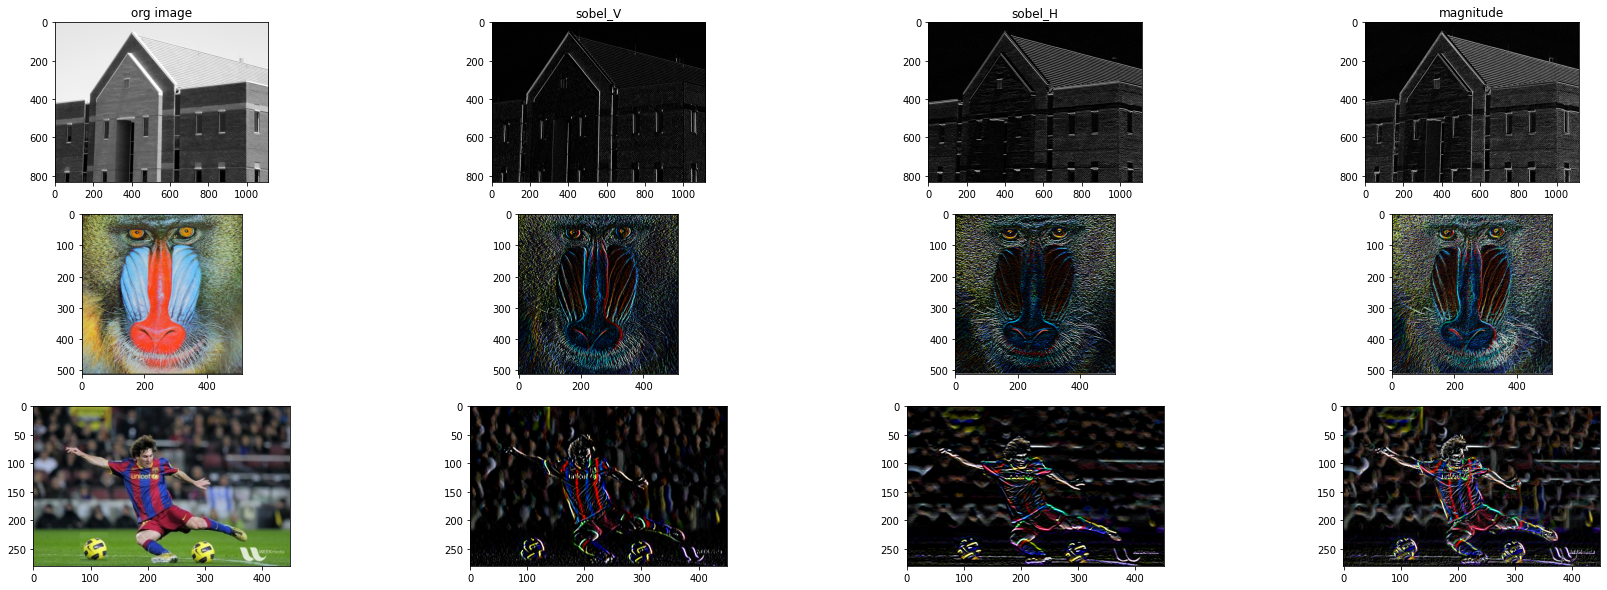

In [93]:

sobel_V =  np.array([[1, 0, -1],
                      [2, 0, -2],
                      [1, 0, -1]])

sobel_H =  np.array([[1, 2, 1],
                      [0, 0, 0],
                      [-1, -2,-1]])

b_flt_imgV = cv2.filter2D(src=building, ddepth=-1, kernel=sobel_V)
b_flt_imgH = cv2.filter2D(src=building, ddepth=-1, kernel=sobel_H)
bul_mag = np.sqrt(b_flt_imgV.astype(int) ** 2 + b_flt_imgH.astype(int) ** 2).astype(np.uint8)

mandril_flt_imgV = cv2.filter2D(src=mandril, ddepth=-1, kernel=sobel_V)
mandril_flt_imgH = cv2.filter2D(src=mandril, ddepth=-1, kernel=sobel_H)
man_mag = np.sqrt(mandril_flt_imgV.astype(int) ** 2 + mandril_flt_imgH.astype(int) ** 2).astype(np.uint8)

messi_flt_imgV = cv2.filter2D(src=messi, ddepth=-1, kernel=sobel_V)
messi_flt_imgH = cv2.filter2D(src=messi, ddepth=-1, kernel=sobel_H)
mess_mag = np.sqrt(messi_flt_imgV.astype(int) ** 2 + messi_flt_imgH.astype(int) ** 2).astype(np.uint8)
  

# cv2.imshow(building)
fig, subplt = plt.subplots(3,4,figsize=(30,10))
subplt[0][0].imshow(building)
subplt[0][0].set_title("org image")
subplt[0][1].imshow(b_flt_imgV)
subplt[0][1].set_title("sobel_V")
subplt[0][2].imshow(b_flt_imgH)
subplt[0][2].set_title("sobel_H")
subplt[0][3].imshow(bul_mag)
subplt[0][3].set_title("magnitude")


subplt[1][0].imshow(mandril)
subplt[1][1].imshow(mandril_flt_imgV)
subplt[1][2].imshow(mandril_flt_imgH)
subplt[1][3].imshow(man_mag)

subplt[2][0].imshow(messi)
subplt[2][1].imshow(messi_flt_imgV)
subplt[2][2].imshow(messi_flt_imgH)
subplt[2][3].imshow(mess_mag)

fig.savefig('Q2_1.png')

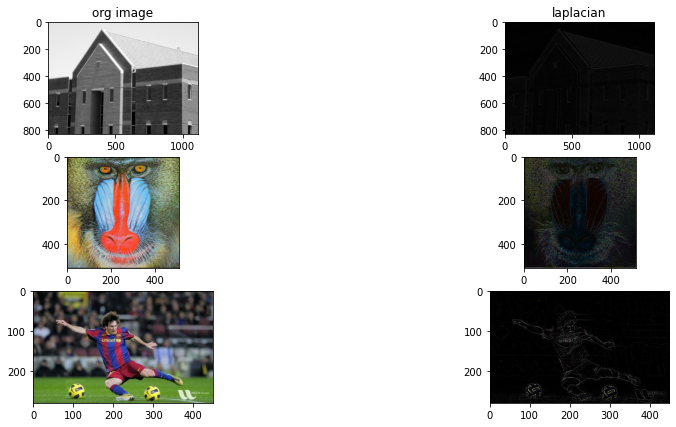

In [94]:
laplacian =  np.array([[0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]])



b_flt = cv2.filter2D(src=building, ddepth=-1, kernel=laplacian)


mandril_flt = cv2.filter2D(src=mandril, ddepth=-1, kernel=laplacian)


messi_flt = cv2.filter2D(src=messi, ddepth=-1, kernel=laplacian)

  

# cv2.imshow(building)
fig, subplt = plt.subplots(3,2,figsize=(15,7))
subplt[0][0].imshow(building)
subplt[0][0].set_title("org image")
subplt[0][1].imshow(b_flt)
subplt[0][1].set_title("laplacian")



subplt[1][0].imshow(mandril)
subplt[1][1].imshow(mandril_flt)


subplt[2][0].imshow(messi)
subplt[2][1].imshow(messi_flt)


fig.savefig('Q2_2.png')

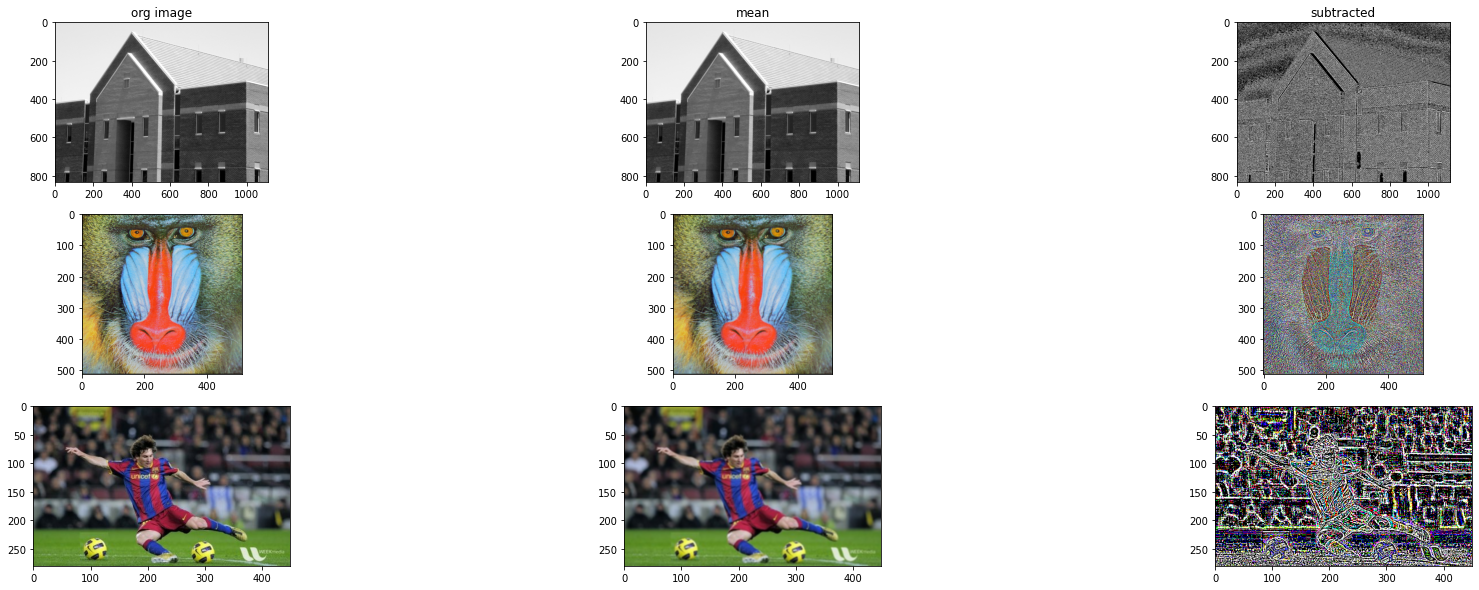

In [95]:
mean =  1/9 * np.array([[1, 1, 1],
                      [1, 1, 1],
                      [1, 1, 1]])



b_flt = cv2.filter2D(src=building, ddepth=-1, kernel=mean)
b_flt_e = building - b_flt 

mandril_flt = cv2.filter2D(src=mandril, ddepth=-1, kernel=mean)
mandril_flt_e = mandril -  mandril_flt

messi_flt = cv2.filter2D(src=messi, ddepth=-1, kernel=mean)
messi_flt_e = messi -  messi_flt
  

# cv2.imshow(building)
fig, subplt = plt.subplots(3,3,figsize=(30,10))
subplt[0][0].imshow(building)
subplt[0][0].set_title("org image")
subplt[0][1].imshow(b_flt)
subplt[0][1].set_title("mean")
subplt[0][2].imshow(b_flt_e)
subplt[0][2].set_title("subtracted")



subplt[1][0].imshow(mandril)
subplt[1][1].imshow(mandril_flt)
subplt[1][2].imshow(mandril_flt_e)


subplt[2][0].imshow(messi)
subplt[2][1].imshow(messi_flt)
subplt[2][2].imshow(messi_flt_e)


fig.savefig('Q2_3.png')

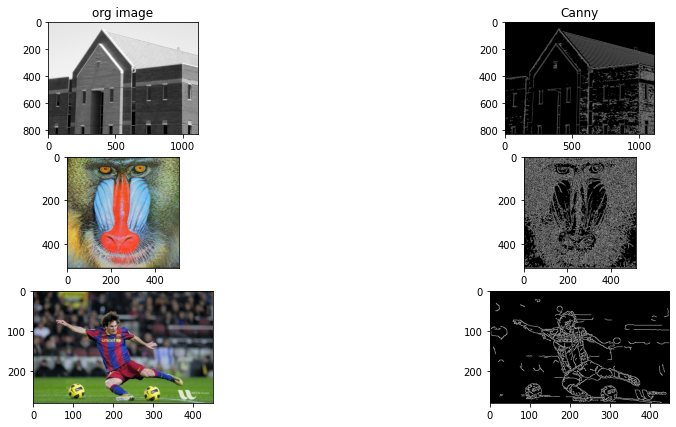

In [96]:
l = 120
u = 200
aperture_size = 3

b_flt = cv2.Canny(building,l,u, apertureSize=aperture_size)


mandril_flt = cv2.Canny(mandril,l,u, apertureSize=aperture_size)


messi_flt =  cv2.Canny(messi,l,u , apertureSize=aperture_size)

  

# cv2.imshow(building)
fig, subplt = plt.subplots(3,2,figsize=(15,7))
subplt[0][0].imshow(building)
subplt[0][0].set_title("org image")
subplt[0][1].imshow(b_flt ,cmap='gray')
subplt[0][1].set_title("Canny")




subplt[1][0].imshow(mandril)
subplt[1][1].imshow(mandril_flt ,cmap='gray')



subplt[2][0].imshow(messi)
subplt[2][1].imshow(messi_flt ,cmap='gray')



fig.savefig('Q2_4.png')


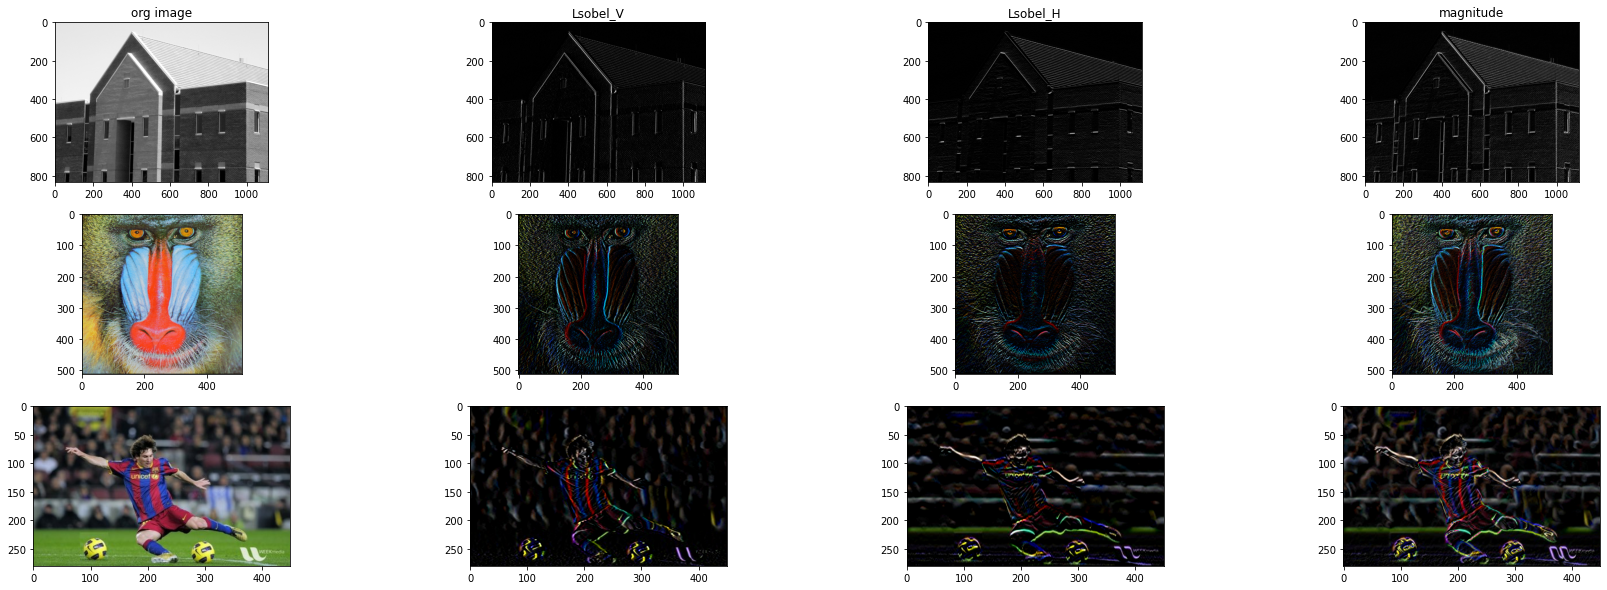

In [98]:
sobel_V =  np.array([[-0.0052625 , -0.0173466 , -0.0427401 , -0.0768961 , -0.957739 , -0.696751 , 0 ,0.696751 , 0.957739 , 0.0768961 , 
0.0427401 , 0.0173466 , 0.0052625]])

sobel_H =  np.array([[-0.0052625] , [-0.0173466] ,[ -0.0427401] , [-0.0768961] , [-0.957739] , [-0.696751] , [0] ,[0.696751] , [0.957739] , [0.0768961] , 
[0.0427401] , [0.0173466] ,[0.0052625]])

b_flt_imgV = cv2.filter2D(src=building, ddepth=-1, kernel=sobel_V)
b_flt_imgH = cv2.filter2D(src=building, ddepth=-1, kernel=sobel_H)
bul_mag = np.sqrt(b_flt_imgV.astype(int) ** 2 + b_flt_imgH.astype(int) ** 2).astype(np.uint8)

mandril_flt_imgV = cv2.filter2D(src=mandril, ddepth=-1, kernel=sobel_V)
mandril_flt_imgH = cv2.filter2D(src=mandril, ddepth=-1, kernel=sobel_H)
man_mag = np.sqrt(mandril_flt_imgV.astype(int) ** 2 + mandril_flt_imgH.astype(int) ** 2).astype(np.uint8)

messi_flt_imgV = cv2.filter2D(src=messi, ddepth=-1, kernel=sobel_V)
messi_flt_imgH = cv2.filter2D(src=messi, ddepth=-1, kernel=sobel_H)
mess_mag = np.sqrt(messi_flt_imgV.astype(int) ** 2 + messi_flt_imgH.astype(int) ** 2).astype(np.uint8)
  

# cv2.imshow(building)
fig, subplt = plt.subplots(3,4,figsize=(30,10))
subplt[0][0].imshow(building)
subplt[0][0].set_title("org image")
subplt[0][1].imshow(b_flt_imgV)
subplt[0][1].set_title("Lsobel_V")
subplt[0][2].imshow(b_flt_imgH)
subplt[0][2].set_title("Lsobel_H")
subplt[0][3].imshow(bul_mag)
subplt[0][3].set_title("magnitude")


subplt[1][0].imshow(mandril)
subplt[1][1].imshow(mandril_flt_imgV)
subplt[1][2].imshow(mandril_flt_imgH)
subplt[1][3].imshow(man_mag)

subplt[2][0].imshow(messi)
subplt[2][1].imshow(messi_flt_imgV)
subplt[2][2].imshow(messi_flt_imgH)
subplt[2][3].imshow(mess_mag)

fig.savefig('Q2_5.png')